# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | askern
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | robertsport
Processing Record 8 of Set 1 | phongsali
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | saacow
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | tuy hoa
Processing Record 17 of Set 1 | negapatam
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,97,96,1.79,NZ,1726432531
1,askern,53.6164,-1.1524,13.82,88,63,3.09,GB,1726432532
2,la passe,45.5549,-0.8967,14.90,51,68,4.50,FR,1726432533
3,puerto ayora,-0.7393,-90.3518,22.53,93,76,3.58,EC,1726432534
4,ilulissat,69.2167,-51.1000,-0.29,75,99,1.61,GL,1726432535


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,97,96,1.79,NZ,1726432531
1,askern,53.6164,-1.1524,13.82,88,63,3.09,GB,1726432532
2,la passe,45.5549,-0.8967,14.90,51,68,4.50,FR,1726432533
3,puerto ayora,-0.7393,-90.3518,22.53,93,76,3.58,EC,1726432534
4,ilulissat,69.2167,-51.1000,-0.29,75,99,1.61,GL,1726432535


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

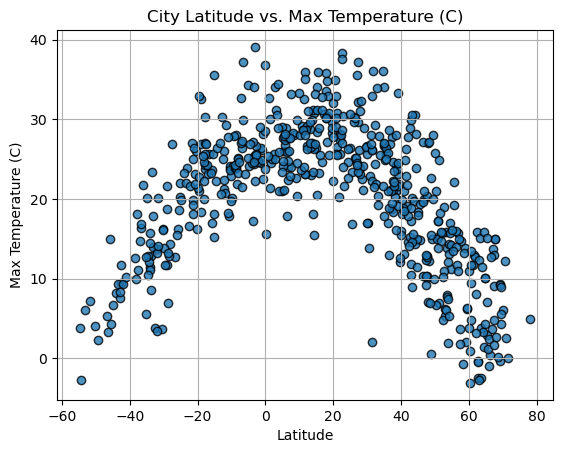

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

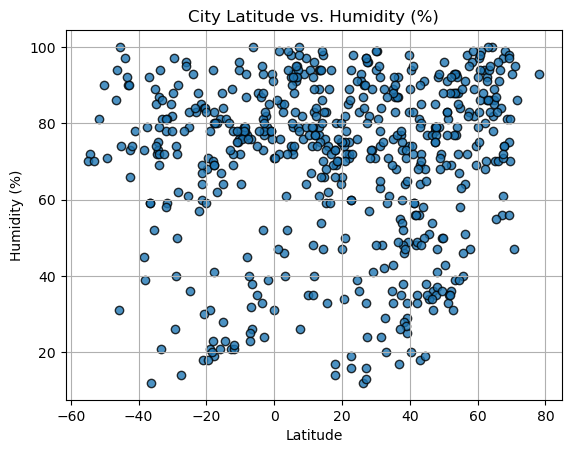

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

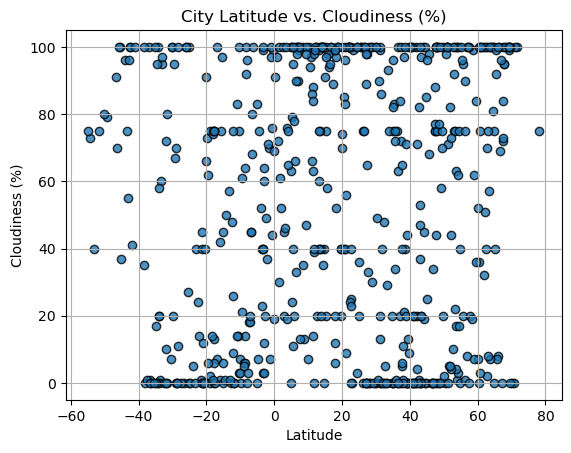

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

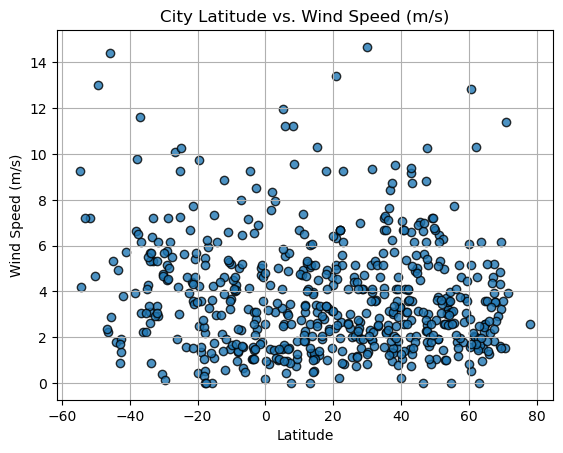

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min() + 2, y_values.min() + 2), fontsize=15, color="red")
      
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print R-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,askern,53.6164,-1.1524,13.82,88,63,3.09,GB,1726432532
2,la passe,45.5549,-0.8967,14.90,51,68,4.50,FR,1726432533
4,ilulissat,69.2167,-51.1000,-0.29,75,99,1.61,GL,1726432535
6,robertsport,6.7533,-11.3686,24.00,95,100,4.91,LR,1726432538
7,phongsali,21.6833,102.1058,20.27,85,100,0.20,LA,1726432539


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,97,96,1.79,NZ,1726432531
3,puerto ayora,-0.7393,-90.3518,22.53,93,76,3.58,EC,1726432534
5,adamstown,-25.0660,-130.1015,20.29,79,100,7.25,PN,1726432536
8,belmonte,-15.8631,-38.8828,23.62,81,1,3.64,BR,1726432540
10,blackmans bay,-43.0167,147.3167,7.63,90,55,0.89,AU,1726432542


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.593


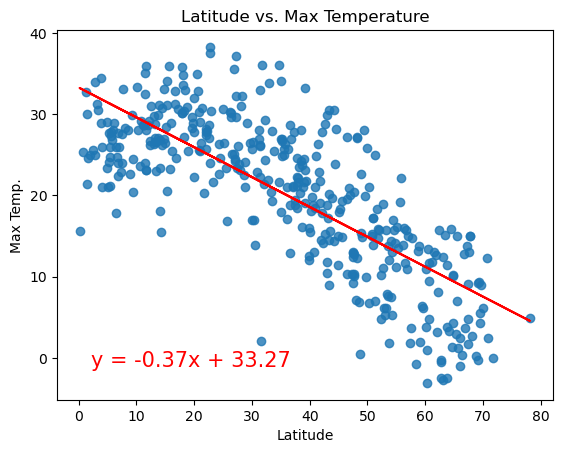

In [26]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp.",
                       "Latitude vs. Max Temperature",
                       "output_data/Northern_Temp_Lat_Linear_Regression.png")

The r-squared is: 0.666


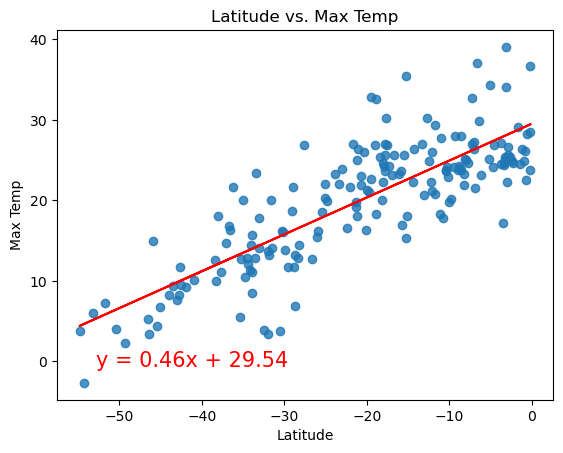

In [27]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp",
                       "Latitude vs. Max Temp",
                       "output_data/Southern_Temp_Lat_Linear_Regression.png")

**Discussion about the linear relationship:** 

In the Northern Hemisphere he linear regression line shows a negative slope, which means there is an inverse relationship between latitude and temperature. The further north you go, the colder it gets. This is expected due to the decreasing intensity of solar radiation as you move toward the poles.

In the Southern Hemiphere a similar pattern is observed, but with decreasing latitudes. The linear regression will also show a negative slope. However, since the Southern Hemisphere has more ocean and less landmass, the temperature trends might show more variability than the Northern Hemisphere.

In conclusion, latitude is a significant factor in determining temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.001


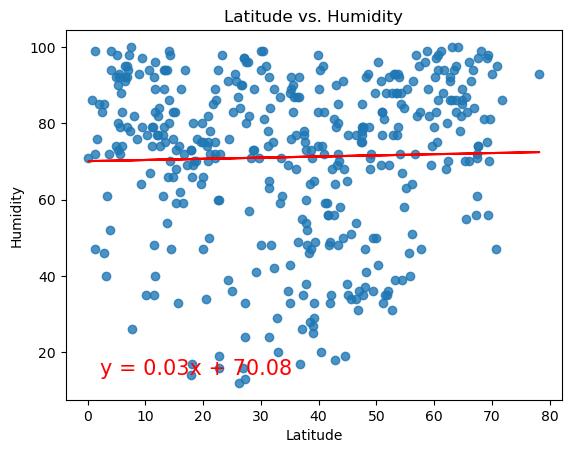

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity",
                       "Latitude vs. Humidity",
                       "output_data/Northern_Humidity_Lat_Linear_Regression.png")

The r-squared is: 0.008


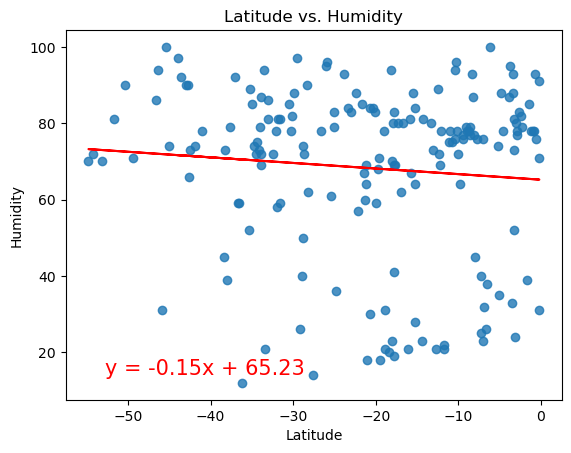

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude", "Humidity",
                       "Latitude vs. Humidity",
                       "output_data/Southern_Humidity_Lat_Linear_Regression.png")

**Discussion about the linear relationship:**

Both Hemispheres Show Weak Relationships: In both hemispheres, the linear regression between latitude and humidity likely yields a weak or inconsistent relationship. Humidity is influenced by many factors other than latitude, such as proximity to oceans, altitude, and local geography. Therefore, latitude alone doesn’t strongly predict humidity levels.

In conclusion, both the Northern and Southern Hemispheres exhibit weak linear relationships between latitude and humidity. While temperature has a strong correlation with latitude due to solar radiation, humidity is more strongly influenced by geographical features like proximity to oceans, mountain ranges, and local weather systems. Thus, latitude is not a significant predictor of humidity in either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.006


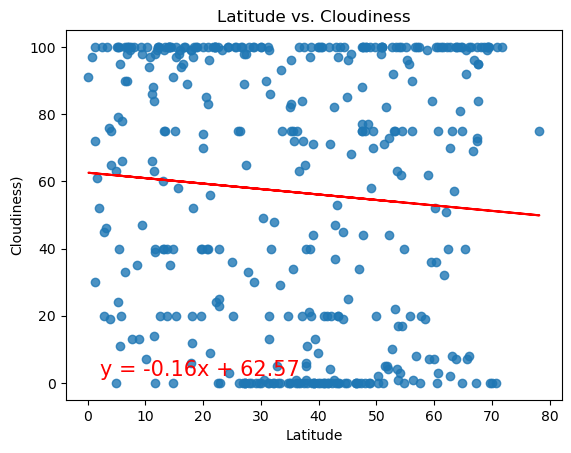

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness)",
                       "Latitude vs. Cloudiness",
                       "output_data/Northern_Cloudiness_Lat_Linear_Regression.png")

The r-squared is: 0.018


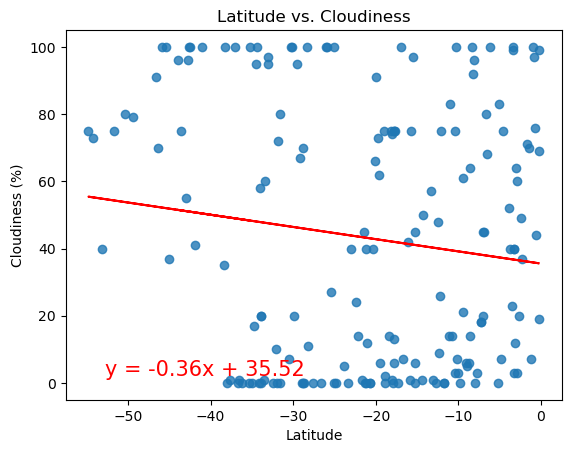

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)",
                       "Latitude vs. Cloudiness",
                       "output_data/Southern_Cloudiness_Lat_Linear_Regression.png")

**Discussion about the linear relationship:** 

Both Hemispheres Show Weak Relationships: In both the Northern and Southern Hemispheres, the relationship between latitude and cloudiness is weak. Cloudiness is heavily influenced by localized geographical features, weather patterns, and seasonal atmospheric conditions. These factors can vary widely across different regions, making latitude a poor predictor of cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000


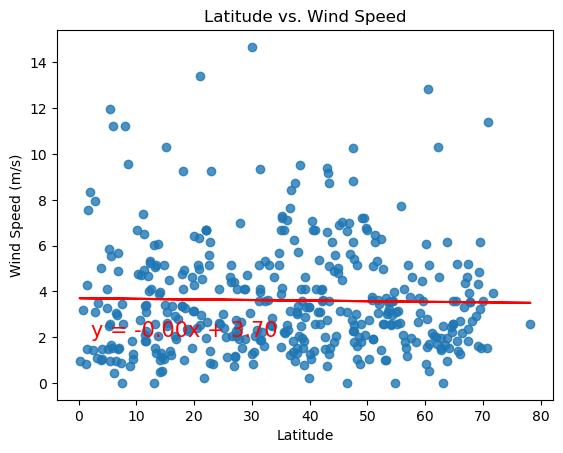

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Latitude vs. Wind Speed",
                       "output_data/Northern_WindSpeed_Lat_Linear_Regression.png")

The r-squared is: 0.070


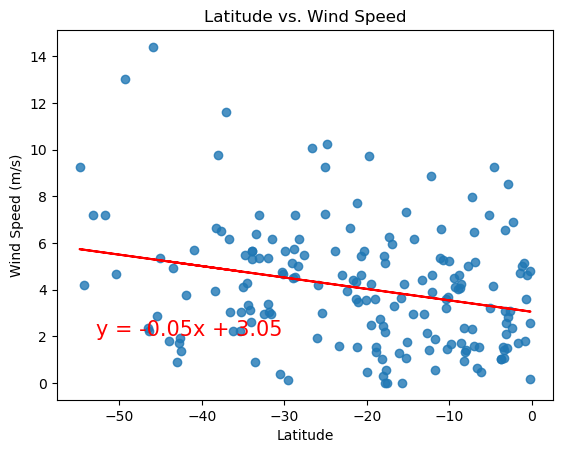

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Latitude vs. Wind Speed",
                       "output_data/Southern_WindSpeed_Lat_Linear_Regression.png")

**Discussion about the linear relationship:** 

Northern Hemisphere Variability: In the Northern Hemisphere, the relationship between latitude and wind speed is more inconsistent. This is because of the larger landmass, complex topography, and the influence of mountain ranges, deserts, and inland plains, which break up wind patterns. As a result, the linear regression may show a weak or negligible relationship.

Southern Hemisphere’s Maritime Influence: In contrast, the Southern Hemisphere is dominated by oceans, which allow for stronger, more consistent wind patterns at certain latitudes (especially between 40° and 60°). Therefore, in the Southern Hemisphere, the relationship between latitude and wind speed may be somewhat stronger, particularly in oceanic regions.

In conclusion, the linear regression analysis for latitude vs. wind speed is likely to show a weak or inconsistent relationship in the Northern Hemisphere, while the Southern Hemisphere may exhibit a stronger correlation in specific latitudinal bands, particularly in the mid-latitudes where oceanic winds dominate.